In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

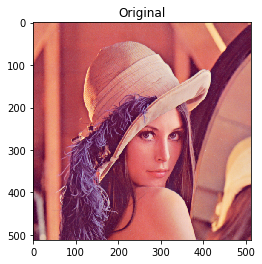

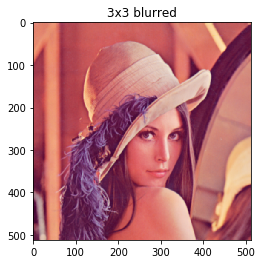

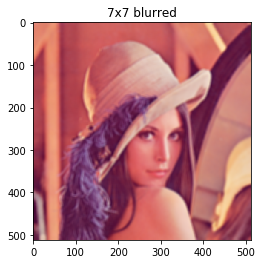

In [8]:
# Image blurring
img = cv2.imread("practice4/lena.png", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 블러링 마스크 정의
blur_mask1 = np.ones((3,3), np.float32)
blur_mask1 /= 9 # 3*3

blur_mask2 = np.ones((7,7), np.float32)
blur_mask2 /= 49 # 7*7

# 컨볼류션(필터)연산 수행
blur_img1 = cv2.filter2D(img, -1, blur_mask1)
blur_img2 = cv2.filter2D(img, -1, blur_mask2)

plt.figure()
plt.title("Original")
plt.imshow(img)

plt.figure()
plt.title("3x3 blurred")
plt.imshow(blur_img1)

plt.figure()
plt.title("7x7 blurred")
plt.imshow(blur_img2)


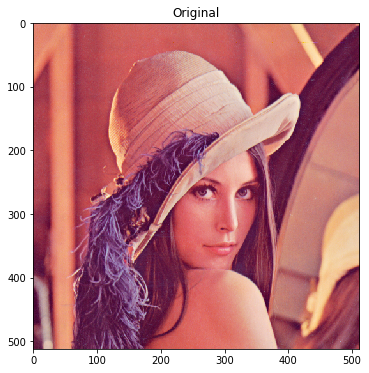

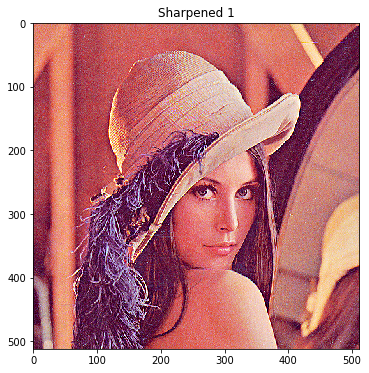

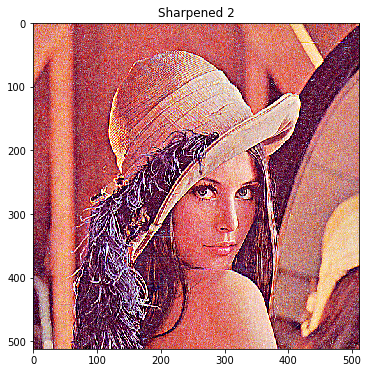

In [10]:
# Image sharpening
img = cv2.imread("practice4/lena.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 샤프닝 마스크 정의 1
sharp_mask1 = np.array([[0,-1,0],
                      [-1,5,-1],
                      [0,-1,0]])

# 샤프닝 마스크 정의 2
sharp_mask2 = np.array([[-1,-1,-1],
                       [-1,9,-1],
                       [-1,-1,-1]])

# 컨볼루션(필터) 연산 수행
sharp_img1 = cv2.filter2D(img, -1, sharp_mask1)
sharp_img2 = cv2.filter2D(img, -1, sharp_mask2)

# 결과 출력
plt.figure(figsize=(6,6))
plt.title("Original")
plt.imshow(img)

plt.figure(figsize=(6,6))
plt.title("Sharpened 1")
plt.imshow(sharp_img1)

plt.figure(figsize=(6,6))
plt.title("Sharpened 2")
plt.imshow(sharp_img2)

In [13]:
# 이미지와 필터링 할 윈도우의 입력받고,
# 중간값 필터링 결과를 return해주는 함수
def median_filtering(img, window_size=3):
    assert len(img.shape) == 2, "Support grayscale image only"
    
    h, w = img.shape
    result_img = np.zeros((h,w), np.uint8)
    
    # window_size를 2로 나눈 몫
    ws2 = window_size // 2
    
    # 윈도우 사이즈의 제곱에서 중심 인덱스
    center_index = (window_size * window_size) // 2
    
    for img_y in range(ws2, h - ws2):
        for img_x in range(ws2, w - ws2):
            
            # 픽셀들을 정렬하기 위해 모아둘 리스트 선언
            pixel_list = []
            
            for win_y in range(-ws2, ws2+1):
                for win_x in range(-ws2, ws2+1):
                    # 현재 계산에 사용될 pixel 위치 계산
                    y = img_y + win_y
                    x = img_x + win_x
                    
                    pixel_list.append(img[y,x])
            
            # 정렬을 수행하고 가운데 값(ws2)를 가져옴
            sorted_list = sorted(pixel_list)
            result_img[img_y, img_x] = sorted_list[center_index]
        
    return result_img

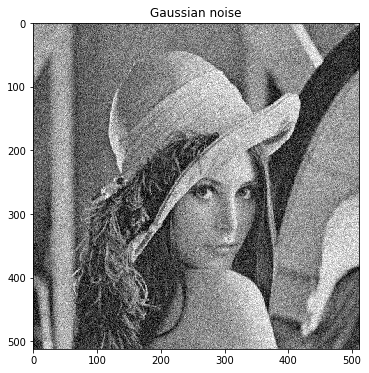

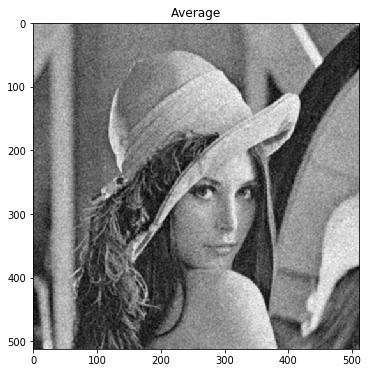

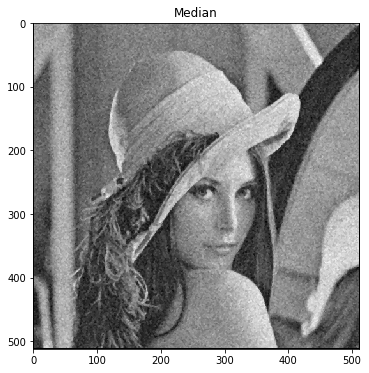

In [16]:
# Gaussian noise
img = cv2.imread("practice4/gaussian.png",0)

# 평균값 필터링 마스크
avg_mask = np.ones((3,3)) / 9

# 평균값 필터링 연산 수행
avg_img = cv2.filter2D(img, -1, avg_mask)

# 중간값 필터링 연산 수행
med_img = median_filtering(img, window_size=3)

# 결과 출력
plt.figure(figsize=(6,6))
plt.title("Gaussian noise")
plt.imshow(img, cmap='gray')

plt.figure(figsize=(6,6))
plt.title("Average")
plt.imshow(avg_img, cmap='gray')

plt.figure(figsize=(6,6))
plt.title("Median")
plt.imshow(med_img, cmap='gray')

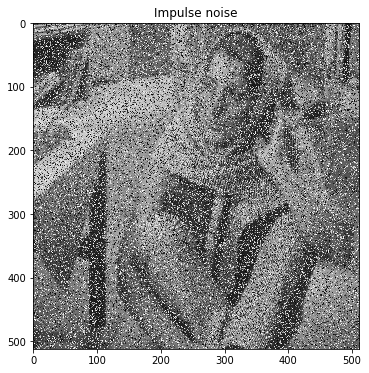

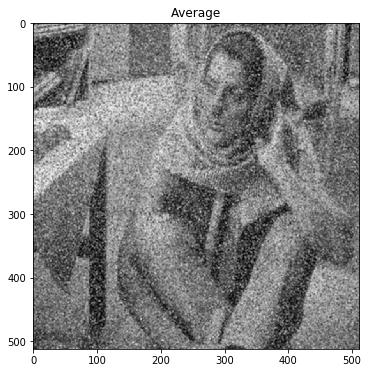

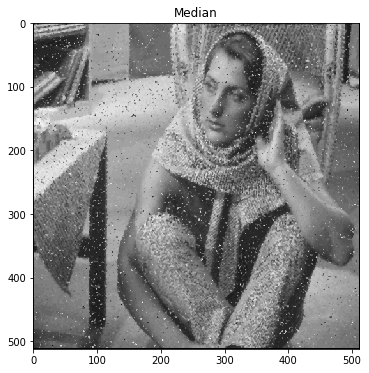

In [17]:
# Impulse noise
img = cv2.imread("practice4/impulse.png",0)

# 평균값 필터링 마스크
avg_mask = np.ones((3,3)) / 9

# 평균값 필터링 연산 수행
avg_img = cv2.filter2D(img, -1, avg_mask)

# 중간값 필터링 연산 수행
med_img = median_filtering(img, window_size=3)

# 결과 출력
plt.figure(figsize=(6,6))
plt.title("Impulse noise")
plt.imshow(img, cmap='gray')

plt.figure(figsize=(6,6))
plt.title("Average")
plt.imshow(avg_img, cmap='gray')

plt.figure(figsize=(6,6))
plt.title("Median")
plt.imshow(med_img, cmap='gray')

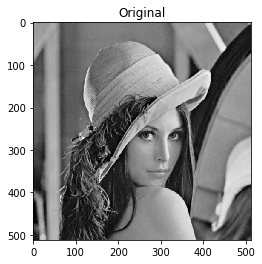

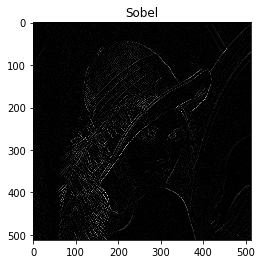

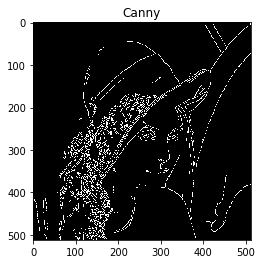

In [18]:
# Edga detection
img = cv2.imread("practice4/lena.png", 0)

#                              (x, y) 미분 차수
edge_sobel = cv2.Sobel(img, -1, 1, 1)

#                           (weak, strong)
edge_canny = cv2.Canny(img, 100, 200)

# 결과 출력
plt.figure()
plt.title("Original")
plt.imshow(img, cmap='gray')

plt.figure()
plt.title("Sobel")
plt.imshow(edge_sobel, cmap='gray')

plt.figure()
plt.title("Canny")
plt.imshow(edge_canny, cmap='gray')

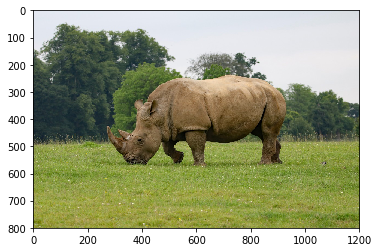

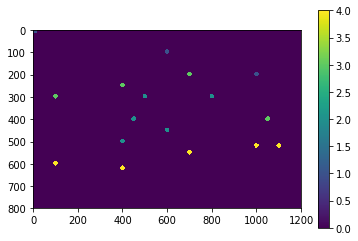

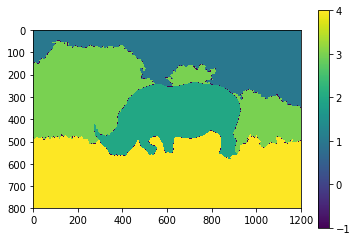

In [21]:
# 마커기반 watershed
img = cv2.imread("practice4/rhino.png")
h, w, c = img.shape

plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

markers = cv2.imread("practice4/markers.png", 0)
markers = np.int32(markers)

plt.figure()
plt.imshow(markers)
plt.colorbar()

result = cv2.watershed(img, markers)

plt.figure()
plt.imshow(result)
plt.colorbar()